In [1]:
import os
import torch
from deeplsd.models.deeplsd_inference import DeepLSD
from line_understanding.pipeline import process_image_pipeline, plot_pipeline_results
from line_understanding.json_saver import save_lines_to_json 


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
conf = {'detect_lines': True, 'line_detection_params': {'merge': False, 'filtering': True, 'grad_thresh': 3}}
ckpt = torch.load('../weights/deeplsd_md.tar', map_location='cpu', weights_only=False)
net = DeepLSD(conf)
net.load_state_dict(ckpt['model'])
net = net.to(device).eval()



In [3]:
frame_str = "0001"
desired_images = [
    "ai_001_001",
    "ai_001_004",
]



data/ai_001_001/ai_001_001/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_001_001/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_001_001/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
data/ai_001_001/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0001.position.hdf5
[Neighborhood Method] ai_001_001: Detected 414 lines; 60 structural.


/home/Soufiane/.conda/envs/3dv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/Soufiane/.conda/envs/3dv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


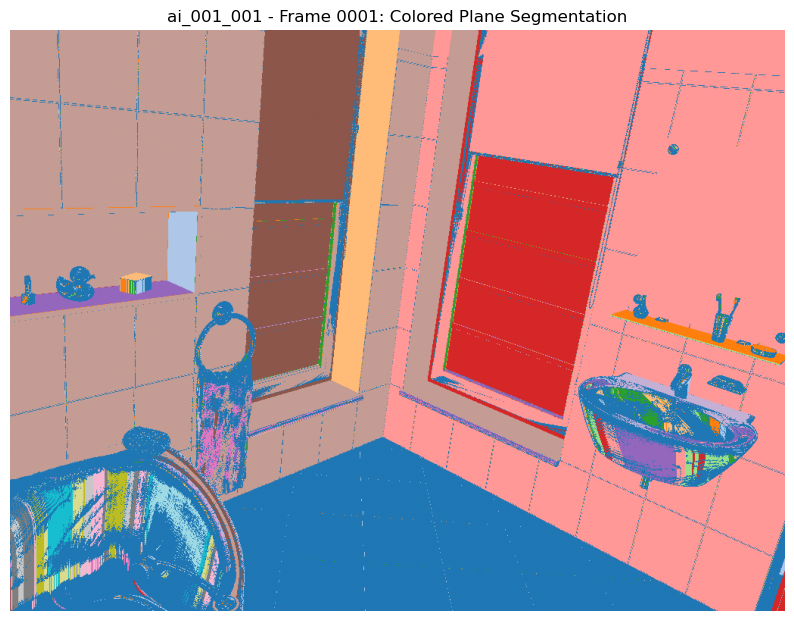

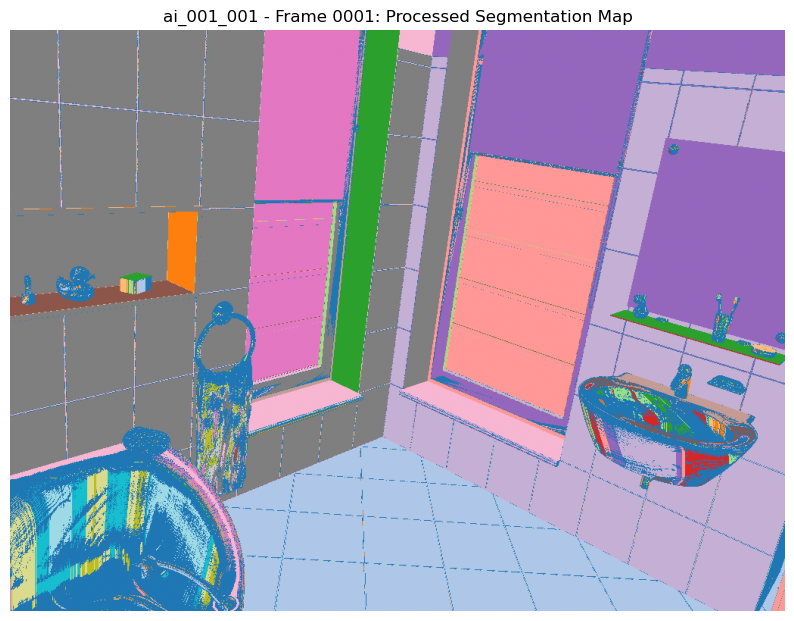

Unique Labels: [np.int32(-1), np.int32(262), np.int32(711), np.int32(1183), np.int32(1184), np.int32(1185), np.int32(1186), np.int32(1187), np.int32(1188), np.int32(1189), np.int32(1190), np.int32(1191), np.int32(1192), np.int32(1193), np.int32(1196), np.int32(2481), np.int32(4013), np.int32(4613), np.int32(5079), np.int32(5109), np.int32(6974), np.int32(7008), np.int32(7140), np.int32(7141), np.int32(7142), np.int32(7143), np.int32(7144), np.int32(7366), np.int32(7367), np.int32(7368), np.int32(7369), np.int32(7882), np.int32(7918), np.int32(8574), np.int32(8577), np.int32(8784), np.int32(9194), np.int32(9195), np.int32(9196), np.int32(9197), np.int32(9199), np.int32(9201), np.int32(9208), np.int32(9209), np.int32(9210), np.int32(9212), np.int32(9213), np.int32(9214), np.int32(9216), np.int32(9218), np.int32(9222), np.int32(9226), np.int32(9227), np.int32(9228), np.int32(9229), np.int32(9230), np.int32(9231), np.int32(9598), np.int32(9947), np.int32(11773), np.int32(11857), np.int32(1

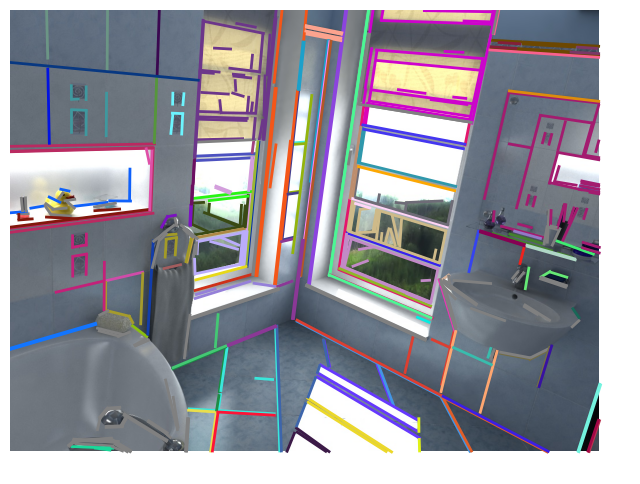

data/ai_001_004/ai_001_004/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_001_004/ai_001_004/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_001_004/ai_001_004/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
data/ai_001_004/ai_001_004/images/scene_cam_00_geometry_hdf5/frame.0001.position.hdf5
[Neighborhood Method] ai_001_004: Detected 337 lines; 86 structural.


/home/Soufiane/.conda/envs/3dv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/Soufiane/.conda/envs/3dv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


KeyboardInterrupt: 

In [4]:
# Process, plot, and save JSON data for each image.
for image_id in desired_images:
    processed_data = process_image_pipeline(image_id, frame_str, net, device)
    if processed_data is not None:
        plot_pipeline_results(processed_data, frame_str)
        save_lines_to_json(image_id, processed_data["line_info"])